## **프로젝트 : 나랑 닮은 연예인을 찾아보자**

In [1]:
# 필요한 라이브러리 불러오기
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img 

### **Step 1. 사진 모으기**

file_list: ['김윤석.jpeg', '벤 에플렉.jpeg', '류진.jpg', '브래들리 쿠퍼.jpg', '리아.jpg', '돈스파이크.jpg', '백윤식.png', '김고은.jpeg', '로제.jpg', '서장훈.jpg', '조승우.jpeg', '차범근.jpeg', '레오나르도 디카프리오.jpeg', '태연.jpg', '장동건.jpeg', '이성민.jpg', '산들.jpeg', '배성재.jpg', '도지한.jpg', '이정재.jpeg', '류승룡.jpeg', '장원영.jpg', '유해진.jpg', '이희준.jpg', '세훈.jpg', '이근대위.jpeg', '성시경.jpg', '배성우.png', '주진모(올드).jpg', '김태희.jpg', 'b1a4진영.jpeg', '이승철.jpeg', '매드클라운.jpeg', '승희.jpeg', '트와이스다현.jpeg', '정수빈.jpg', '미미.jpg', '장원준.jpeg', '이승환.jpg', '잇섭.png', '트와이스사나.jpg', '신비.jpg', '손나은.jpg', '이영하.jpg', '러블리즈예인.jpg', '마동석.jpeg', '윤종신.jpeg', '잭 블랙.jpeg', '여자아이들수진.jpeg', '러블리즈지수.jpeg', '류현진.jpg', '줄리엔강.png', '주지훈.jpg', '류승범.jpg', '한기범.jpg', '한석규.jpg', '레인보우재경.jpg', '하정우.jpg', 'celebrity.zip', '김대중.jpg', '김경진.png', '송중기.jpeg', '박보검.jpg', '채연.jpg', '최현석.jpg', '드웨인 존슨.jpg', '손예진.jpeg', '크리스 에반스.jpg', '김광현.jpg', '하승진.jpg', '사무엘 L 잭슨.jpg', '주호민.jpeg', '유리.jpg', '박성호.jpg', '우기.jpg', '태양.jpeg', '슬기.jpg', '이효리.jpg', '아이즈원김채원.jpg', '조정석.jpg', '잭 스페이더.jpeg', '트와이스나연.jpg',

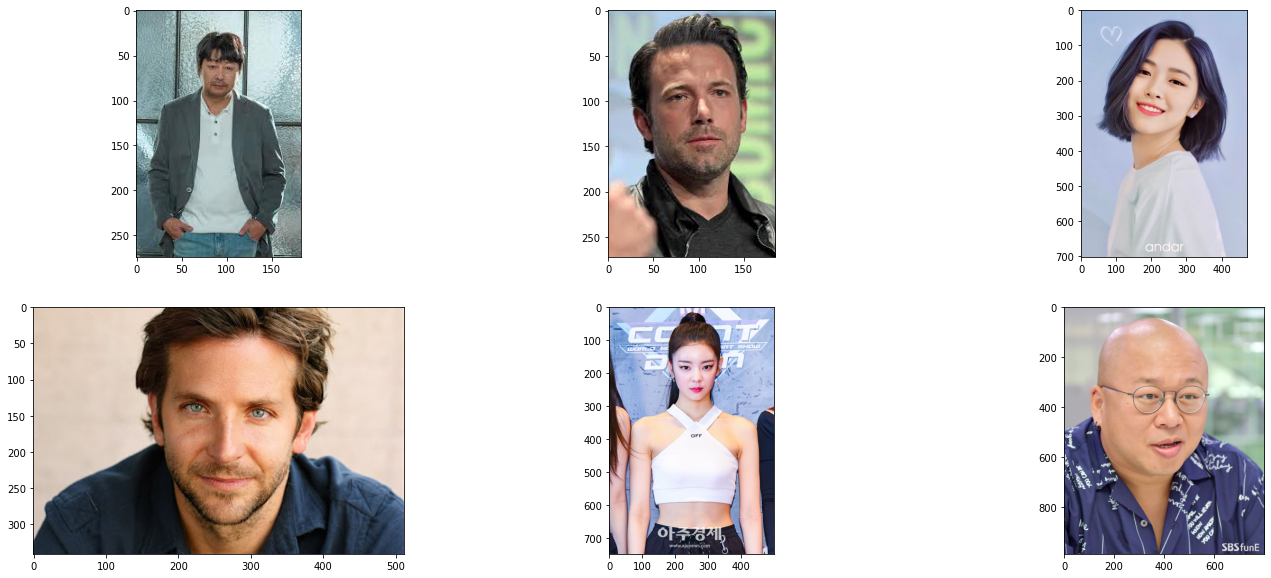

In [2]:
dir_path = os.getenv('HOME') + '/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print("file_list: {}".format(file_list))

# set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path + '/' + file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### **Step 2. 얼굴 영역 자르기**

In [3]:
# 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

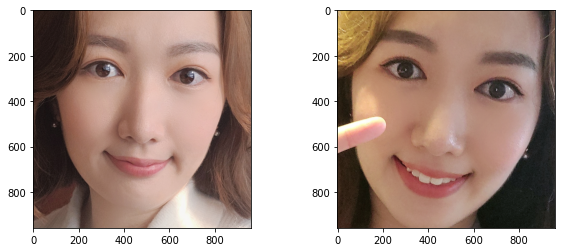

In [4]:
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/이민주1.jpg'
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/images/이민주2.jpg'

cropped_face1 = get_cropped_face(image_path1)
cropped_face2 = get_cropped_face(image_path2)

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(cropped_face1)
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(cropped_face2)

plt.show()

### **Step 3. 얼굴 영역의 임베딩 추출하기**

In [5]:
# 얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            pass
        
    return embedding_dict

In [7]:
# 함수가 잘 만들어졌는지 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['이민주1']

array([-8.01249892e-02,  6.31063059e-02,  2.30573881e-02, -7.01111183e-02,
       -1.06888890e-01, -4.52331007e-02, -7.54406303e-02, -9.77761373e-02,
        1.32481694e-01, -1.23949379e-01,  1.81929782e-01, -1.12827435e-01,
       -1.59105286e-01, -6.54897243e-02, -6.61066249e-02,  2.26251885e-01,
       -2.06827328e-01, -1.82646021e-01, -5.44587635e-02, -1.03742816e-04,
        8.09194818e-02,  7.58004114e-02, -5.92100583e-02,  5.41843437e-02,
       -1.40858486e-01, -3.41396332e-01, -4.72491458e-02,  5.87383285e-04,
        9.12915729e-03, -7.26910084e-02, -6.00600466e-02,  5.90642802e-02,
       -2.19065815e-01,  1.15413312e-02,  7.29973614e-02,  1.41017929e-01,
        2.85266731e-02, -1.12404242e-01,  1.31298929e-01,  3.87691613e-03,
       -3.38158458e-01,  7.01317340e-02,  8.44968036e-02,  2.33446956e-01,
        1.82407945e-01, -2.57783979e-02, -4.45250049e-02, -1.07537605e-01,
        1.09009817e-01, -1.55124933e-01, -5.88832982e-03,  1.69856936e-01,
        2.90444996e-02,  

In [8]:
#  두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('이민주1', '이민주2')

0.2985934716679966

### **Step 4. 모은 연예인들과 비교하기**

In [9]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [10]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(1, top+2):
        if i == 0: # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i][0].startswith('이민주'): # 이름에 '이민주'가 있다면 자기 자신의 사진일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [11]:
get_nearest_face('이민주1')

순위 1 : 이름(윤아), 거리(0.3536437018501222)
순위 2 : 이름(사쿠라), 거리(0.3602112664179647)
순위 3 : 이름(김유정), 거리(0.3640933921936518)
순위 4 : 이름(아이즈원조유리), 거리(0.37059148166745404)
순위 5 : 이름(제이홉), 거리(0.37296245917539345)


In [12]:
get_nearest_face('이민주2')

순위 1 : 이름(태연), 거리(0.34242306748375256)
순위 2 : 이름(사쿠라), 거리(0.3527825084495054)
순위 3 : 이름(채연), 거리(0.3620425654161516)
순위 4 : 이름(윤아), 거리(0.3641479796029863)
순위 5 : 이름(우기), 거리(0.3690458030711116)


### **Step 5. 다양한 재미있는 시각화 시도해 보기**

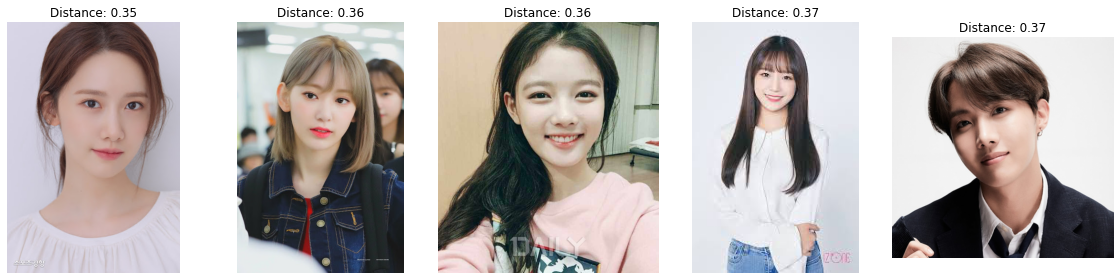

In [13]:
def plot_nearest_faces(nearest_faces):
    num_faces = len(nearest_faces)
    fig, axes = plt.subplots(nrows=1, ncols=num_faces, figsize=(16, 4))

    for i, (name, distance) in enumerate(nearest_faces):
        image_path = os.path.join(dir_path, name)
        if not os.path.isfile(image_path):
            image_path += '.jpg' # 파일이 존재하지 않으면 .jpg 확장자를 추가하여 경로를 다시 설정
            if not os.path.isfile(image_path):
                image_path = os.path.splitext(image_path)[0] + '.jpeg' # .jpg로 찾지 못하면 .jpeg 확장자로 다시 시도
        image = img.imread(image_path)
        axes[i].imshow(image)
        axes[i].set_title('Distance: {:.2f}'.format(distance))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))

    nearest_faces = []
    for i in range(1, top+2):
        if i == 0:
            continue
        if sorted_faces[i][0].startswith('이민주'):
            continue
        if sorted_faces[i]:
            name = sorted_faces[i][0]
            distance = sort_key_func(name)
            nearest_faces.append((name, distance))

    plot_nearest_faces(nearest_faces)

get_nearest_face('이민주1')

---

### **프로젝트 회고**

이번 프로젝트는 뭔가 이전에 해왔던 프로젝트와는 다른 느낌이라 그런지 처음 접해보는 코드들도 많은 것 같아 코드를 이해하려는 데 시간을 많이 쓴 것 같다. 이전 기수분들께서 사용하신 데이터를 공유 받아 사용했는데 embedding 부분에서 'list index out of range'라는 에러가 발생하였고, 산들 사진이 원인인 것을 확인할 수 있었다. 얼굴을 인식하지 못 한 것 같은데 정확한 이유는 알아내기 어려울 것 같다는 생각이 들어 간단하게 예외처리를 해주어 에러를 해결하였다. 가장 어려웠던 부분은 마지막 시각화 부분이였다. 노드에서 알려준대로 tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해보려고 했는데 lms에서는 GUI가 제공되지 않아 할 수가 없었다. 그래서 로컬에서 한번 진행을 해보려고 했지만 파일이 압축 해제가 되지 않는 문제가 발생하여 결국 포기하고 matplotlib으로 구현하는 정도로 만족하기로 했다. 어찌어찌 프로젝트를 마무리하기는 했는데 최근 들어 너무 복붙을 많이 하는 느낌이라 이렇게 하면 안 될 것 같다는 생각이 들어 직접 따라쓰려고 해봤는데, 문득 내가 과연 아무것도 참고하지 않고 오직 내 머리 속에 든 걸로만 혼자 코드를 작성할 수 있는 날이 올까...라는 의문이 들었다. 뭔가 프로젝트를 제출하기에 급급해서 코드 하나하나를 세심하게 뜯어보지 못 한 것 같아 앞으로는 조금 더 마음의 여유를 갖고 코드 하나하나 살펴볼 수 있도록 해야겠다!

#### **새로 알게 된 것!** (이론적인...)
* 임베딩(Embedding): 고차원 정보를 저차원으로 변환하면서 필요한 정보를 보존하는 작업
* 얼굴 인식(Face Recognition): 주어진 이미지나 비디오에서 얼굴 영역을 정확하게 인식하고 이를 특징 벡터로 추출하는 작업
* L2 Normalization: 주어진 벡터를 L2 노름으로 나누어 벡터의 크기를 단위 크기로 조절하는 정규화 과정
* Triplet Loss: 세 개의 데이터 쌍을 이용하여 계산되는 손실 함수
* PCA(Principal Component Analysis): 주어진 데이터의 주요 성분을 추출하여 데이터의 차원을 축소하는 방법
* T-SNE: 고차원 데이터의 시각화를 위해 주로 사용되는 비선형 차원 축소 기법

**얼굴 인식 과정**
1. Input Image: 얼굴이 있는 이미지를 준비한다.
2. Detection: 이미지에서 얼굴을 찾아낸다.
3. Crop: 얼굴 영역을 잘라낸다.
4. Deep Neural Network: 잘라낸 얼굴을 딥러닝 네트워크에 입력하여 얼굴의 특징을 추출한다.
5. Clustering(군집화), Similarity(유사도), Classification(분류): 딥러닝 네트워크의 출력을 활용하여 다양한 작업을 수행할 수 있다.

**FaceNet의 특징**
* L2 Normalization: 네트워크의 출력인 임베딩 벡터를 정규화하여 크기를 조절한다.
* Triplet Loss: 세 개의 데이터 쌍을 이용하여 임베딩 벡터를 학습하는데, 동일한 사람의 얼굴 이미지로부터 얻은 임베딩 벡터들 간의 거리를 가깝게, 다른 사람의 얼굴 이미지로부터 얻은 임베딩 벡터와의 거리를 멀게 학습한다.

**참고한 레퍼런스**
<br>Vertex AI Matching Engine 개요 https://cloud.google.com/vertex-ai/docs/matching-engine/overview?hl=ko
<br>Face Recognition https://github.com/ageitgey/face_recognition
<br>C4W4L04 Triplet loss https://www.youtube.com/watch?v=d2XB5-tuCWU
<br>Embedding Projector https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/
<br>차원 감소(Dimension reduction) 와 PCA 분석 https://bcho.tistory.com/1209?category=555440
<br>StatQuest: t-SNE, Clearly Explained https://www.youtube.com/watch?v=NEaUSP4YerM